
# Project: Investigate No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

No-show appointment dataset is about no-show/show on medical appointment. It has attributes like Area where the appointment was booked, the day appointment was booked & scheduled day of appointment. 
It does states that if a patient have any of the diseases Diabetes, Hipertension, Alcoholism or if handicap. It states patient is M/F and the Age. It also has information if the patient is enrolled in Bolsa Familia Program (a government sponsored medical program).


Questions could be:
1. What age group shows most at the appointment?
2. M/F which group are more health oriented?
3. Which disease Diabetes, Hipertension, Alcoholism, Handcap patients appear most at appointment?
4. Most popular Neighbourhood areas?
5. Does the time gap between making an appointment and actual appointment affects show?
6. Does having Scholarship affects a patient to appear at appointment or not?


In [35]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [36]:
#READING FILE AND LOOKING AT FIRST FEW RECORDS
df = pd.read_csv('noshowappointments-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
#TOTAL PATIENTS
df.shape

(110527, 14)

In [38]:
#LOOKING AT THE MISSING RECORDS IN DATASET IF ANY AND DATATYPES OF 14 ATTRIBUTES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Observations:

* Here we don't have any missing records.
* ScheduledDay & AppointmentDay have string datatypes, but we need to convert them to datetime as this stores the date and  time the patient makes an appointment and the actual day of appointment.
* No-show column ---> to No_show, so that it doesn't throw error.


In [39]:
#DROPPING PatientId & AppointmentID
df.drop(labels=['AppointmentID','PatientId'], axis = 1, inplace=True)

In [40]:
#LOOKING AT AGE COLUMN.
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*For Age column, min value is -1, it is irrelevant to have this value.
So this needs to be cleaned.*

In [41]:
#CHECKING FOR more irrelevant values in Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

So here for Age column -1 is the only value irrelevant.

In [42]:
#CONVERTING THE ScheduledDay DATATYPE TO datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors = 'coerce')

In [43]:
#CONVERTING THE AppointmentDay DATATYPE TO datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors = 'coerce')

In [44]:
#RENAMING No-show ---> No_show for error free code processing
df.rename(columns={"No-show": "No_show"}, inplace = True)

### Replacing Age value -1 with mean of the column.

In [45]:
#REPLACING Age column value -1 with mean() of Age
df['Age'].replace(to_replace = -1, value = int(df['Age'].mean()), inplace=True)

In [46]:
#CHECKING FOR Age column values, value is been replaced
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

## Will add a new column Daystoappt, it will hold the number of days between the appointment was scheduled and actual day of appointment

In [47]:
#CALCULATNG DAYS between scheduled day and appointment day
Daystoappt = df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date

In [48]:
#ADDING NEW COLUMN "Daystoappt" to the dataset
df['Daystoappt'] = Daystoappt.dt.days

In [49]:
#CHECKING NEWLY ADDED COLUMN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
Daystoappt        110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.0+ MB


In [50]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Daystoappt
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis

In [51]:
#LOOKING AT No_show column values (number of shows and no-shows at appointment)
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

### Creating two seperate dataframes.
1. df_show ---> will hold all the patients who showed at the appointment
2. df_noshow ---> will hold all the patients who didn't show at the appointment.

In [52]:
#ENCODING SAYS PATIENT SHOWED AT APPT IF VALUE IS 'NO'
df_show = df.query('No_show == "No"')

In [53]:
#ENCODING SAYS PATIENT DIDN'T SHOW AT APPT IF VALUE IS 'YES'
df_noshow = df.query('No_show == "Yes"')

**Functions to plot Overlapped Histogram, Line charts, Bar Chart & Scatter **

In [54]:
#Function to plot overlapped Histogram
def plot_hist(column, title, xlbl = "", ylbl = "", no_of_bins = 10, N = 0, ticks = ""):
    df_show[column].hist(alpha = 0.5,bins = no_of_bins, label='Show', color = 'g')
    df_noshow[column].hist(alpha = 0.5, bins = no_of_bins, label='No Show', color = 'r')
    if N != 0 :
        plt.xticks(np.arange(N), ticks)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.title(title, fontsize=15)
    
    plt.legend();

In [55]:
#CODE REFERENCE FOR PLOTTING column charts https://matplotlib.org/examples/api/barchart_demo.html
#Function to plot column charts for variables
def plot_colchart(N, y_noshow, y_show, title, xlbl, ylbl, ticks):
    x = np.arange(N)
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y_noshow, width, color='r')
    rects2 = ax.bar(x + width, y_show, width, color='g')

    ax.set_title(title, fontsize=15)
    ax.set_ylabel(ylbl, fontsize=15)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(ticks)
    ax.set_xlabel(xlbl, fontsize=15)

    ax.legend((rects1[0], rects2[0]), ('No Show','Show'));

In [56]:
def plot_barchart(x, y, title, xlbl, ylbl):
    plt.bar(x, y)
    if len(x) > 20:
        plt.xticks(rotation='vertical', fontsize=15)
        plt.title(title, fontsize=25)
    else:
        plt.title(title, fontsize=15)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.legend();

In [57]:
def plot_scatter(show, noshow, title, xlbl, ylbl):
    
    show_rec = plt.scatter(x=show.index, y=show.values, marker = 'o', color = 'g');
    noshow_rec = plt.scatter(x=noshow.index, y=noshow.values, marker = 'x', color = 'r');

    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.legend((show_rec, noshow_rec), ('Show', 'No Show'), scatterpoints=1);

## Does the time gap between making an appointment and actual appointment affects?

In [58]:
#CALCULATING MEAN OF Daystoappt FOR RECORDS WHO SHOWED AT APPOINTMENT
df_show['Daystoappt'].mean()

8.7546594413205145

In [59]:
#CALCULATING MEAN OF Daystoappt FOR RECORDS WHO DIDN'T SHOW AT APPOINTMENT
df_noshow['Daystoappt'].mean()

15.83148886598862

**Bar Chart for mean of both the values**

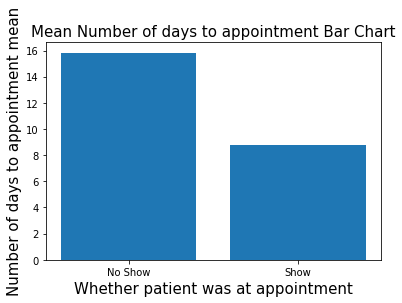

In [60]:
x = ['Show', 'No Show']
y = [df_show['Daystoappt'].mean(), df_noshow['Daystoappt'].mean()]

plot_barchart(x, y, 'Mean Number of days to appointment Bar Chart', 'Whether patient was at appointment', 'Number of days to appointment mean')

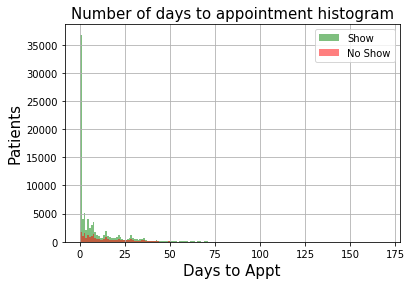

In [61]:
#Plotting histogram for Daystoappt variable
plot_hist('Daystoappt', 'Number of days to appointment histogram', 'Days to Appt', 'Patients', range(0, 170))
#len(df_show['Daystoappt'].unique())

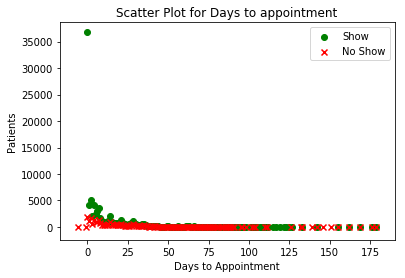

In [62]:
#Scatter plot for Daystoappt variable
df_show_daystoappt = df_show['Daystoappt'].value_counts()
df_noshow_daystoappt = df_noshow['Daystoappt'].value_counts()

plot_scatter(df_show_daystoappt, df_noshow_daystoappt, 'Scatter Plot for Days to appointment', 'Days to Appointment', 'Patients')

### Observation for Daystoappt
Data is right skewed for histogram.<br>
No-Show's are very less compared to number of Show's for days 0-10.<br>
**So less the time differnce between sheduling and actual appointment day, most likely the patient is to appear at the appointment.**
**Histogram for Daystoappt gives the same observation as well.**

### For Patients who showed at appointment the time between scheduling appointment and actual day of appointment was much less than for those who didn't show at appointment <br>

### Which are the most popular Neighbourhood areas?

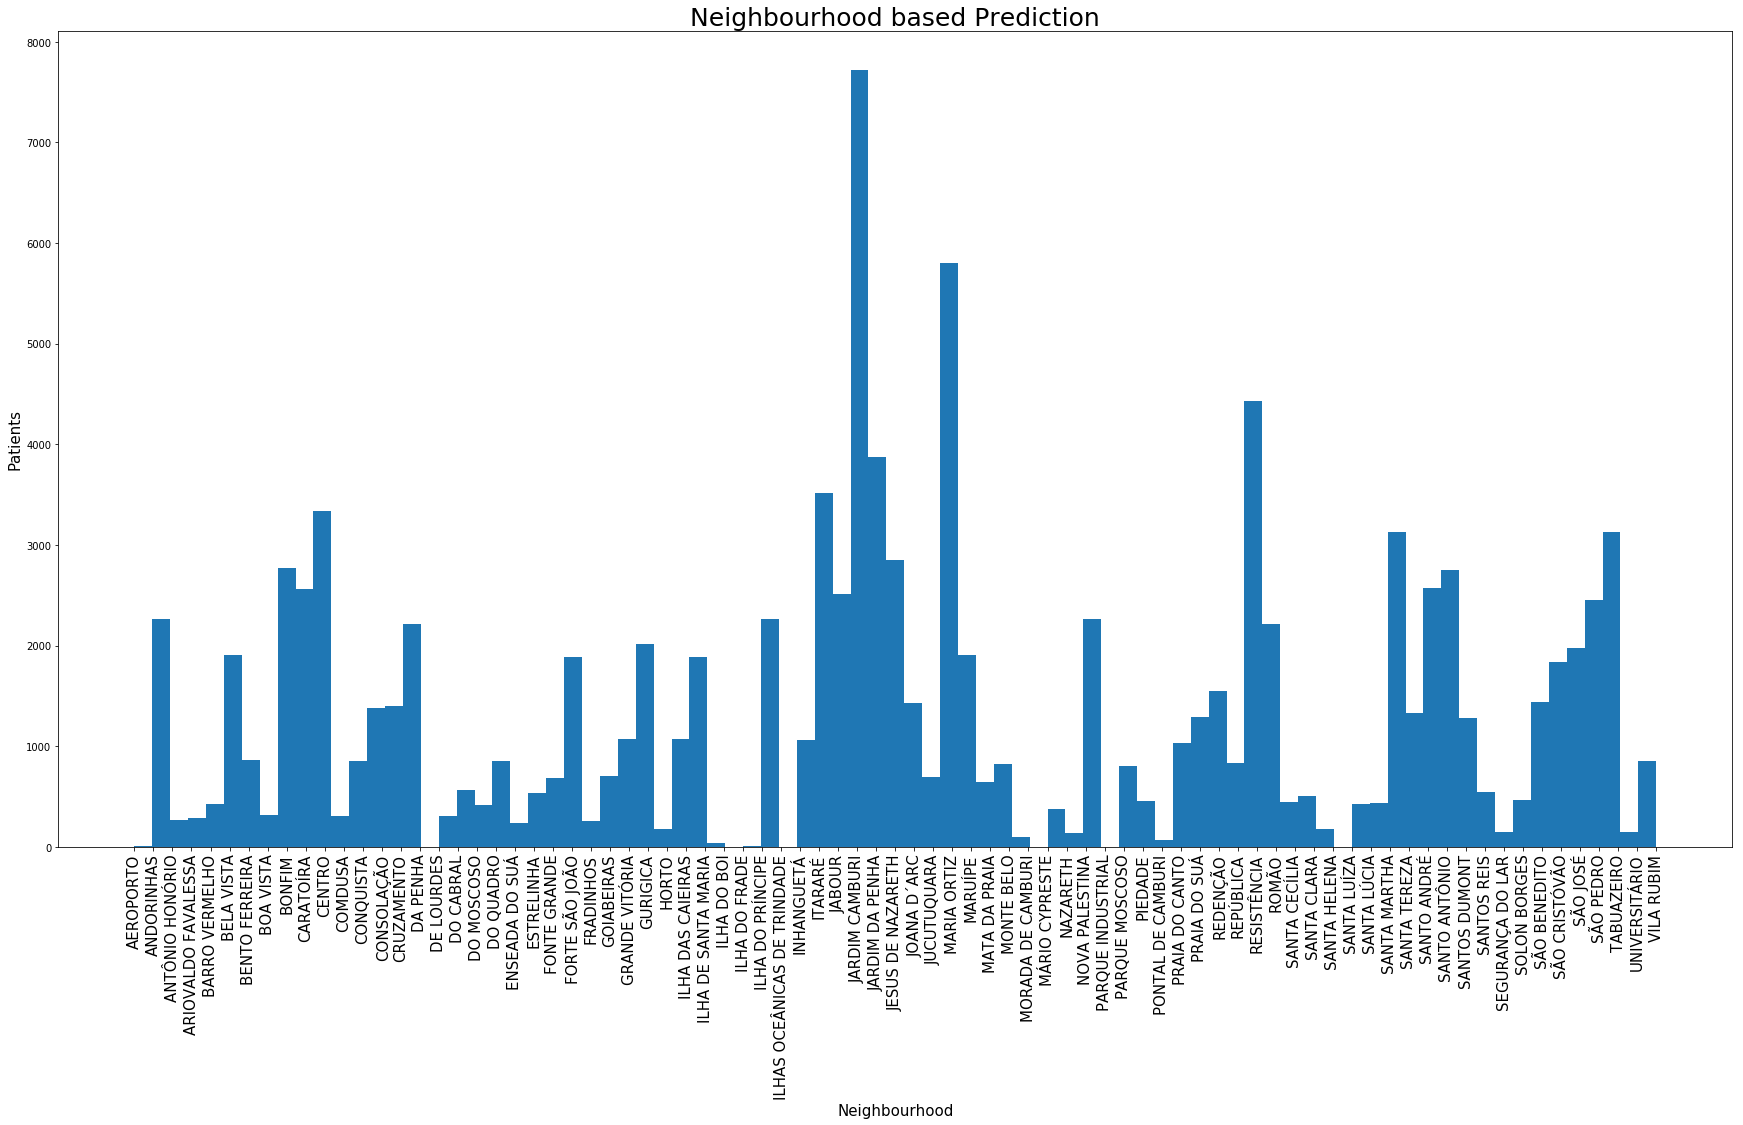

In [63]:
#Plotting histogram for Neighbourhood variable
plt.figure(figsize=(30, 15));
plt.hist(df['Neighbourhood'], bins=85);
plt.xticks(rotation='vertical', fontsize=15)
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Patients', fontsize=15)
plt.title('Neighbourhood based Prediction', fontsize=25)
plt.legend();

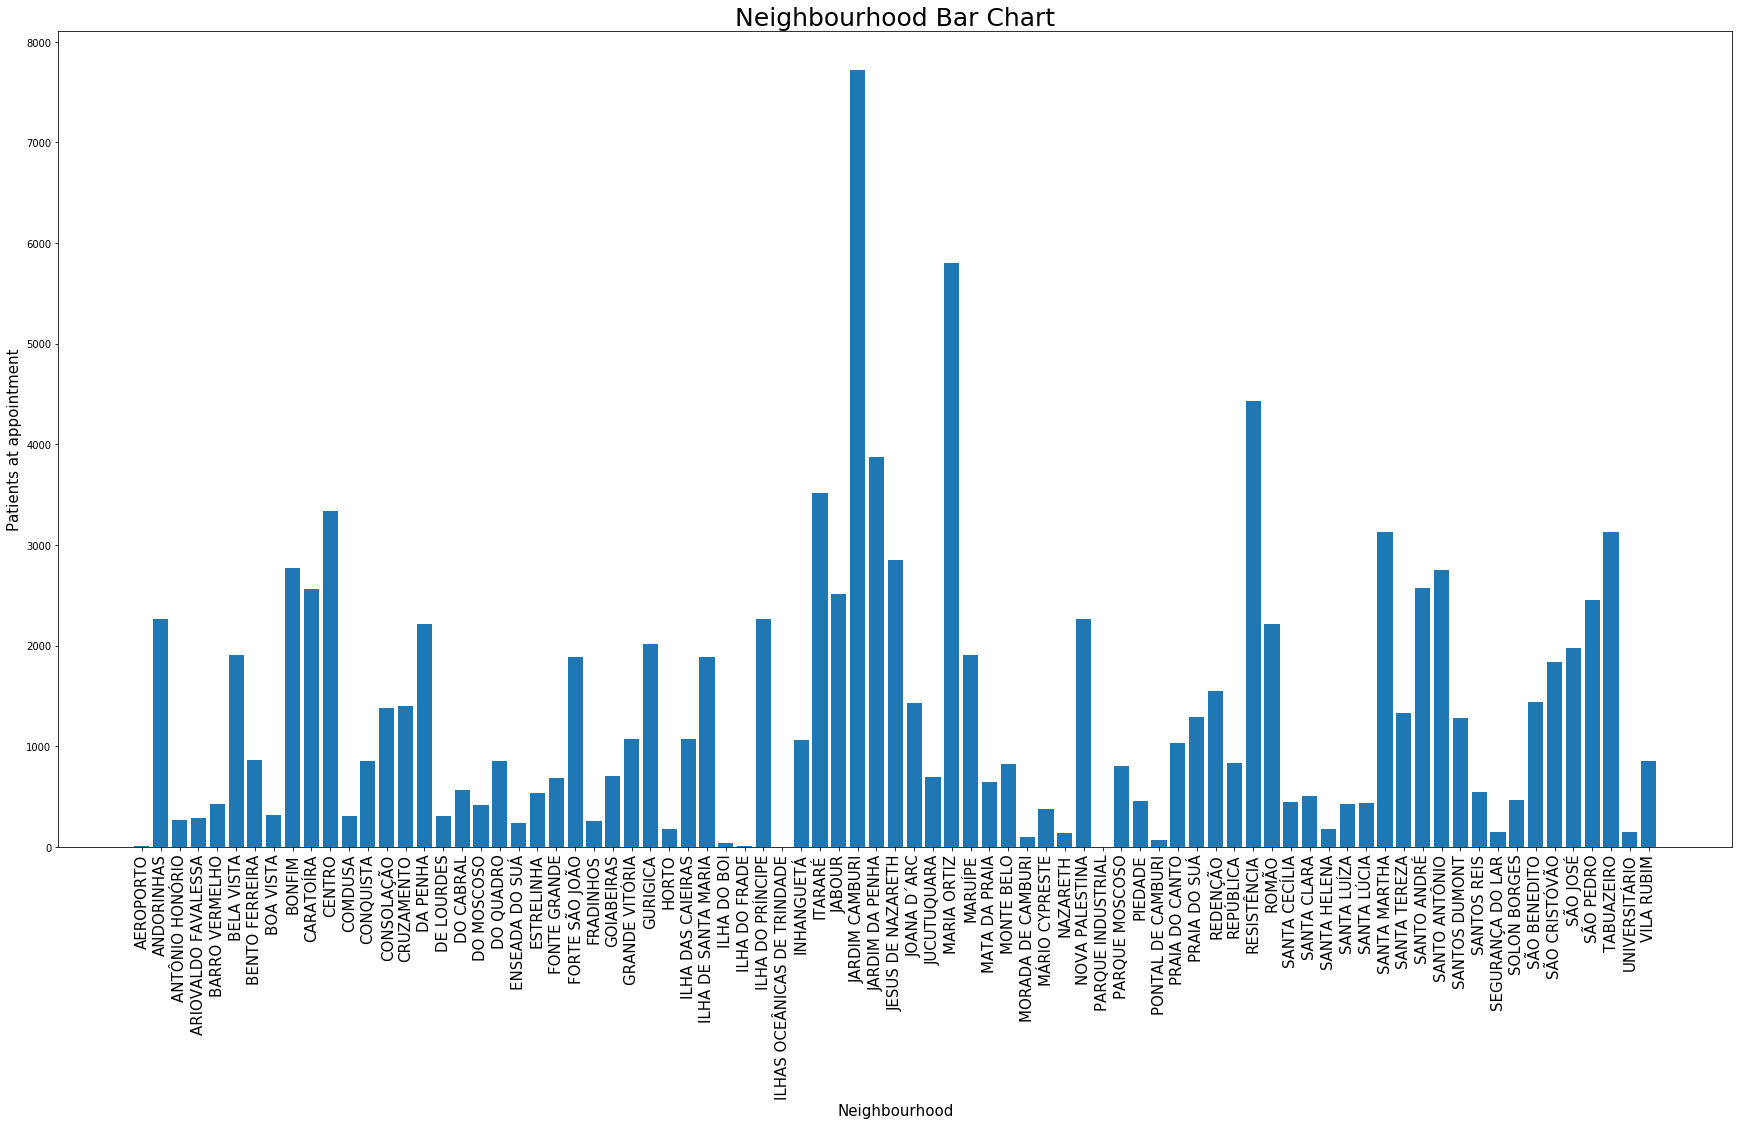

In [64]:
#Plotting Bar Chart for Neighbourhood variable
df_neighbourhood = df['Neighbourhood'].value_counts();
x = df_neighbourhood.index
y = df_neighbourhood.values
plt.figure(figsize=(30, 15))
plot_barchart(x, y, 'Neighbourhood Bar Chart', 'Neighbourhood', 'Patients at appointment')

### Observation for Neighbourhood variable:
1. Area with highest shows at appointment - 
    > **JARDIM CAMBURI**
2. Area with lowest PAT - 
    > **DA PINHA**<br>
    > **ILHA DO BOI**<br>
    > **ILHAS OCEANICAS DE TRINDADE**<br>
    > **MORADA DE CAMBURI**<br>
    > **PARQUE INDUSTRIAL**<br>
    > **PARQUE INDUSTRIAL**<br> 

### M/F which group are more health oriented?

In [65]:
#Showing counts for M/F. 
#No_show encoding 
#No --> who appeared at the appointment
#Yes --> who didn't appear at the apointment
df.groupby(['Gender','No_show']).count()

ScheduledDay  AppointmentDay    Age  Neighbourhood  \
Gender No_show                                                       
F      No              57246           57246  57246          57246   
       Yes             14594           14594  14594          14594   
M      No              30962           30962  30962          30962   
       Yes              7725            7725   7725           7725   

                Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
Gender No_show                                                             
F      No             57246         57246     57246       57246    57246   
       Yes            14594         14594     14594       14594    14594   
M      No             30962         30962     30962       30962    30962   
       Yes             7725          7725      7725        7725     7725   

                SMS_received  Daystoappt  
Gender No_show                            
F      No              57246       57246  
       Yes             14594       14594  
M      No              30962       30962  
       Yes              7725        7725

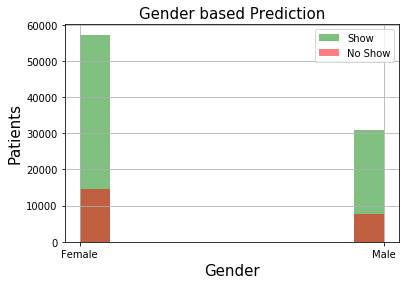

In [66]:
#Plotting histogram for Gender variable
ticks = ('Female', 'Male')
plot_hist('Gender', 'Gender based Prediction', 'Gender', 'Patients', 10 , 2, ticks)

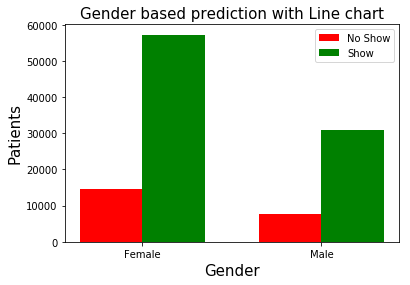

In [67]:
#Plotting Column chart for Gender

#selecting records who didn't show at appointment for any variable hipertension, diabetes, alcoholism, handcap set to true/1
y_noshow = [df_noshow.query('Gender == "F"').count()[0], df_noshow.query('Gender == "M"').count()[0]]
#selecting records who showed at appointment for any variable hipertension, diabetes, alcoholism, handcap set to true/1
y_show = [df_show.query('Gender == "F"').count()[0], df_show.query('Gender == "M"').count()[0]]

ticks = ['Female', 'Male']
plot_colchart(2, y_noshow, y_show, 'Gender based prediction with Line chart', 'Gender', 'Patients', ticks)

### Observation for Gender variable
   > **Count matches with on both the plots**<br>
   > **Female group is more health oriented than Male.**<br>

### What age group shows most at the appointment?

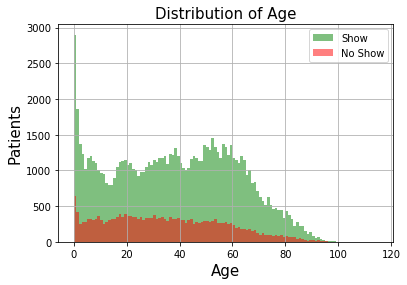

In [68]:
#Plotting histogram for different ages
#plot_hist(column, title, xlbl = "", ylbl = "", no_of_bins = 10, N = 0, ticks = ""):
plot_hist('Age', 'Distribution of Age', 'Age', 'Patients', 115)

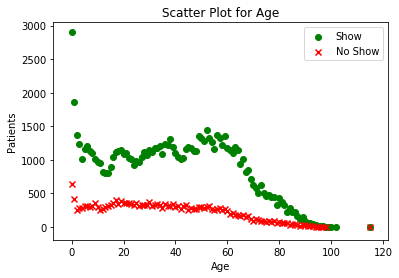

In [69]:
#Scatter plot for patients who appeared at the appointment
df_show_age = df_show['Age'].value_counts()
df_noshow_age = df_noshow['Age'].value_counts()

plot_scatter(df_show_age, df_noshow_age, 'Scatter Plot for Age', 'Age', 'Patients')

### Observation Age variable
 > **Patients in age group 0-10 & 50-60 appears most at appointments.**
 
 ### Which disease Diabetes, Hipertension, Alcoholism, Handcap patients appear most at appointment?

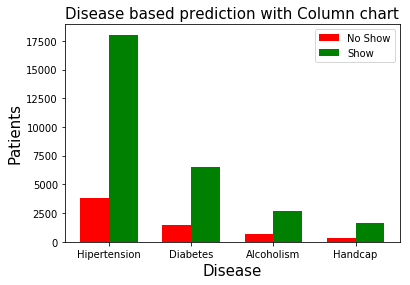

In [70]:
#Plotting a column chart for 4 disease variables

#selecting records who didn't show at appointment for any variable hipertension, diabetes, alcoholism, handcap set to true/1
y_noshow = [df_noshow.query('Hipertension == 1').count()[0], df_noshow.query('Diabetes == 1').count()[0], df_noshow.query('Alcoholism == 1').count()[0], df_noshow.query('Handcap == 1').count()[0]]
#selecting records who showed at appointment for any variable hipertension, diabetes, alcoholism, handcap set to true/1
y_show = [df_show.query('Hipertension == 1').count()[0], df_show.query('Diabetes == 1').count()[0], df_show.query('Alcoholism == 1').count()[0], df_show.query('Handcap == 1').count()[0]]

ticks = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
plot_colchart(4, y_noshow, y_show, 'Disease based prediction with Column chart', 'Disease', 'Patients', ticks)

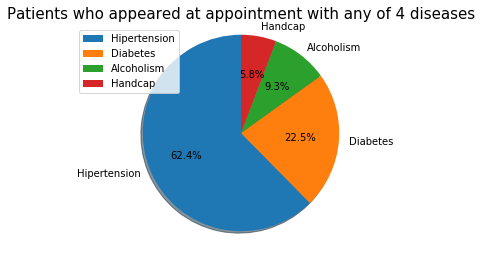

In [71]:
#Pie chart code reference from https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html?highlight=pie%20chart
#Plotting a pie chart to show patients who appear at appointments with 4 diseases
labels = 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'
sizes = [df_show.query('Hipertension == 1').count()[0], df_show.query('Diabetes == 1').count()[0], df_show.query('Alcoholism == 1').count()[0], df_show.query('Handcap == 1').count()[0]]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Patients who appeared at appointment with any of 4 diseases', fontsize=15)
plt.legend();

### Observation
**Patients with hipertension appear most at the appointment.**<br>

### Does Scholarship affects patients to appear at the appointment?

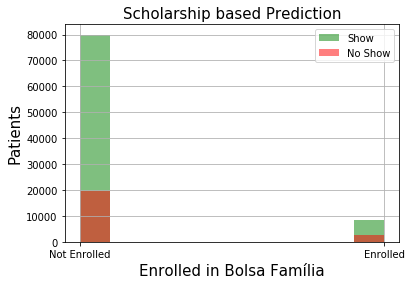

In [72]:
#Plotting histogram for Scholarship variable
ticks = ('Not Enrolled', 'Enrolled')
plot_hist('Scholarship', 'Scholarship based Prediction', 'Enrolled in Bolsa Família', 'Patients', 10, 2, ticks)

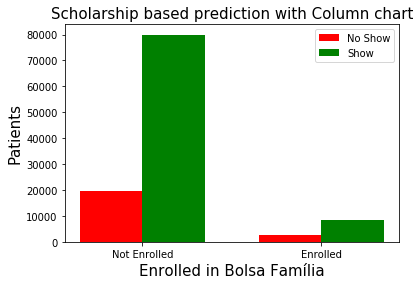

In [73]:
#Plotting a column chart for Scholarship variables

#selecting records who didn't show at appointment for any variable hipertension, diabetes, alcoholism, handcap set to true/1
y_noshow = [df_noshow.query('Scholarship == 0').count()[0], df_noshow.query('Scholarship == 1').count()[0]]
#selecting records who showed at appointment for any variable hipertension, diabetes, alcoholism, handcap set to true/1
y_show = [df_show.query('Scholarship == 0').count()[0], df_show.query('Scholarship == 1').count()[0]]

ticks = ['Not Enrolled', 'Enrolled']
plot_colchart(2, y_noshow, y_show, 'Scholarship based prediction with Column chart', 'Enrolled in Bolsa Família', 'Patients', ticks)
#df.query('No_show == "No" and Scholarship == 1').count()

## Observation
>**Patients not enrolled in scholarship appear most at the appointment.**

### Checking Dataset for limitations on AppointmentDay column

In [74]:
#pd.set_option('display.max_rows',100000)
df['AppointmentDay'].dt.month.value_counts()

5    80841
6    26451
4     3235
Name: AppointmentDay, dtype: int64

<a id='conclusions'></a>
# Conclusions

### Daystoppt - Less the time gap between scheduling and the appointment, most likely patient will appear at the appointment
### Gender - Females are most likely to appear at appointment
### Scholarship - If *not* enrolled in Bolsa Familia Program, most likely to appear at appointment.
### Age - Age group 0-10 & 50-60 are most likely to appear at appointment as compared to other age groups.
### Looking at the bar chart/Pie chart for 4 Disease variable, Patients with Hipertension are most likely to appear at the appointment.

### Neighbourhood variable gives the most popular hospitals in the country.

## <font color=red>Limitation</font>
 > ***Not a representative sample.***<br>
 > For ScheduledDay column, has data only for 3 months of the year, April,May,June (4,5,6). This doesn't represent data all year round which adversely effects in readings.<br>
 > *Like for Winter or Fall it could be totally different scenario, as these are more prone to diseases.*


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])